In [1]:
%matplotlib ipympl
from models import *
from impedance.models.circuits import CustomCircuit
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpmath import *

In [71]:
#freq Range
f=np.logspace(-3,1,30)

#lin, ilin, two alpha
alpha=1

#lin params
R1_lin=4400
Q_lin=1e-3
R2_lin=3000

#ilin
R1_ilin=4400
Q_ilin=1e-3
R2_ilin=3000

#two
R1_two=6000
Q_two=1e-3
R2_two=2000
delta=0.21

In [72]:
L_lin=(2/3)*(0.75*R1_lin+0.25*R2_lin)

L_ilin=(2/3)*(3*R1_ilin*R2_ilin/(R1_ilin-R2_ilin)**3*(R1_ilin**2*np.log(R1_ilin/R2_ilin)-(3/2)*(R1_ilin-R2_ilin/3)*(R1_ilin-R2_ilin)))

L_two=(2/3)*(R1_two+(1-delta)**3*(R2_two-R1_two))

L_all=[L_lin,L_ilin,L_two]

print(L_all)

[2700.0, 2643.174962501703, 2685.229333333333]


In [73]:
#delta for two
# delta=0.5

#lin circuit
c_lin=CustomCircuit(initial_guess=[R1_lin,R1_lin*Q_lin,R2_lin*Q_lin,alpha],circuit="TLMlinnew")
z_lin=c_lin.predict(f)

#ilin circuit
mp.dps=300
c_ilin=CustomCircuit(initial_guess=[R1_ilin,R1_ilin*Q_ilin,R2_ilin*Q_ilin,alpha],circuit="TLMilinnew")
z_ilin=c_ilin.predict(f)
mp.dps=20

#two circuit
c_two=CustomCircuit(initial_guess=[R1_two,R1_two*Q_two,R2_two*Q_two,delta,alpha],circuit="TLMtwo")
z_two=c_two.predict(f)


In [74]:
c_all=[c_lin,c_ilin,c_two]
z_all=[z_lin,z_ilin,z_two]
profiles=["lin","ilin","two"]
linestyles=["-","--",":"]
markers=['o','s','^']

In [75]:
#set the fontsize, labelsizes and fonts etc. for the plots to be made below
plt.rcParams['font.size']=12
plt.rcParams['axes.labelsize']=12
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14
plt.rcParams['ytick.labelsize']=14
plt.rcParams['lines.markersize']=4


# fig, axs=plt.subplots(3,3)
# fig.set_size_inches(8,8)

# for ax,prof,c,ls in zip(axs[0],profiles,c_all,linestyles):
#     ax.set_xlabel("x")
#     ax.set_ylabel("$R_{ion}$")
#     if prof=="lin":
#         ax.plot([0,1],[c.initial_guess[0]/1000,(1/1000)*c.initial_guess[2]*c.initial_guess[0]/c.initial_guess[1]],linestyle=ls)

#     if prof=="ilin":
#         xx=np.linspace(0,1)
#         rx=1/((1/c.initial_guess[0])+(1/(c.initial_guess[2]*c.initial_guess[0]/c.initial_guess[1])-1/c.initial_guess[0])*xx)
#         ax.plot(xx,rx/1000,linestyle=ls)

#     if prof=="two":
#         ax.plot([0,delta,delta,1],[c.initial_guess[0]/1000,c.initial_guess[0]/1000,(1/1000)*c.initial_guess[2]*c.initial_guess[0]/c.initial_guess[1],(1/1000)*c.initial_guess[2]*c.initial_guess[0]/c.initial_guess[1]],linestyle=ls)

# for ax,z,ls in zip(axs[1],z_all,linestyles):
#     ax.set_xlabel("Re(Z) $k\Omega$")
#     ax.set_ylabel("-Im(Z) $k\Omega$")
#     ax.plot(np.real(z)/1000,-np.imag(z)/1000,linestyle=ls)
#     ax.set_aspect("equal")
#     ax.set_xlim(0,5)
#     ax.set_ylim(0,5)

# for ax,z,ls in zip(axs[2],z_all,linestyles):
#     ax.plot(f,-np.angle(z,deg=True),linestyle=ls)
#     ax.set_xlabel("f [Hz]")
#     ax.set_ylabel("$\Theta$ ($^o$)")
#     theta_min=min(-np.angle(z,deg=True))
#     print(theta_min)
#     ax.set_xscale("log")
#     ax_inset=inset_axes(ax,width="50%",height="30%",loc="upper right")
#     ax_inset.set_xscale("log")
#     ax_inset.plot(f,-np.angle(z,deg=True),linestyle=ls)
#     ax_inset.set_ylim(34,42)
#     # ax_inset.plot()
#     # ax.set_aspect("equal")
#     # ax.set_xlim(0,10000)
#     # ax.set_ylim(0,10000)
#     print(ax.get_xlim())
# # 
# fig.tight_layout()

42.07876396156697
41.86143176901561
34.849272933884464


C:\Users\Gaming\AppData\Local\Temp\ipykernel_13940\2870626111.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


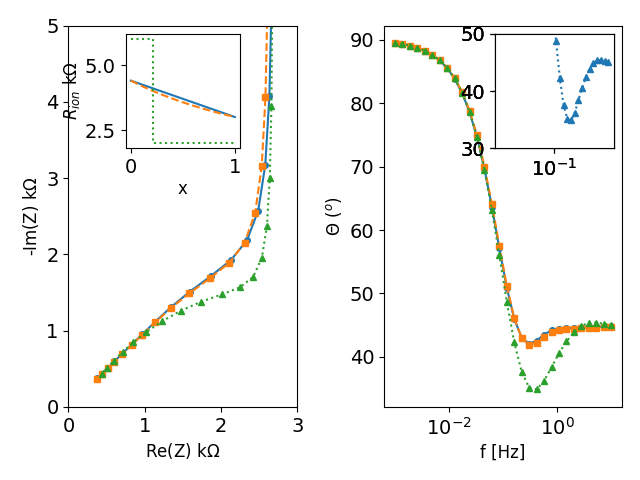

In [76]:
plt.cla()
fig, axs = plt.subplots(1,2)
#plot the nyquist plot

ax_nyq=axs[0]
# ax_inset=inset_axes(ax,width="50%",height="30%",loc="upper right")
ax_prof=inset_axes(ax_nyq,width="50%",height="30%",loc="upper center")
ax_prof=
for prof,c,ls in zip(profiles,c_all,linestyles):
    ax_prof.set_xlabel("x",labelpad=2)
    ax_prof.set_ylabel("$R_{ion}$ k$\Omega$",labelpad=2)
    if prof=="lin":
        ax_prof.plot([0,1],[c.initial_guess[0]/1000,(1/1000)*c.initial_guess[2]*c.initial_guess[0]/c.initial_guess[1]],linestyle=ls)

    if prof=="ilin":
        xx=np.linspace(0,1)
        rx=1/((1/c.initial_guess[0])+(1/(c.initial_guess[2]*c.initial_guess[0]/c.initial_guess[1])-1/c.initial_guess[0])*xx)
        ax_prof.plot(xx,rx/1000,linestyle=ls)

    if prof=="two":
        ax_prof.plot([0,delta,delta,1],[c.initial_guess[0]/1000,c.initial_guess[0]/1000,(1/1000)*c.initial_guess[2]*c.initial_guess[0]/c.initial_guess[1],(1/1000)*c.initial_guess[2]*c.initial_guess[0]/c.initial_guess[1]],linestyle=ls)

for z,ls,m in zip(z_all,linestyles,markers):
    ax_nyq.set_xlabel("Re(Z) k$\Omega$")
    ax_nyq.set_ylabel("-Im(Z) k$\Omega$")
    ax_nyq.plot(np.real(z)/1000,-np.imag(z)/1000,linestyle=ls,marker=m)
    ax_nyq.set_aspect("equal")
    ax_nyq.set_xlim(0,3)
    ax_nyq.set_ylim(0,5)


ax_bode=axs[1]
for z,ls,m in zip(z_all,linestyles,markers):
    ax_bode.plot(f,-np.angle(z,deg=True),linestyle=ls,marker=m)
    ax_bode.set_xlabel("f [Hz]")
    ax_bode.set_xscale("log")
    ax_bode.set_ylabel("$\Theta$ ($^o$)")
    theta_min=min(-np.angle(z,deg=True))
    print(theta_min)

    ax_b_zoom=inset_axes(ax_bode,width="50%",height="30%",loc="upper right")
    ax_b_zoom.plot(f,-np.angle(z,deg=True),linestyle=ls,marker=m)
    ax_b_zoom.set_xscale("log")
    ax_b_zoom.set_ylim(30,50)
    # ax_inset.plot()
    # ax.set_aspect("equal")
    # ax.set_xlim(0,10000)
    # ax.set_ylim(0,10000)
#plot the bode plot
fig.tight_layout()

In [77]:
# import matplotlib.pyplot as plt

# # Generate some sample data
# x = range(10)
# y = [i**2 for i in x]

# plt.plot(x, y)
# plt.xlabel('X Axis Label', labelpad=5)  # Adjust labelpad value as needed
# plt.ylabel('Y Axis Label', labelpad=5)  # Adjust labelpad value as needed
# plt.show()
